In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
df= pd.read_csv("E:\\CS_proj\\artifacts\\data_ingestion\\winequality-red.csv")

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# Data Cleaning and Preparation
# Check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
# Descriptive statistics
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

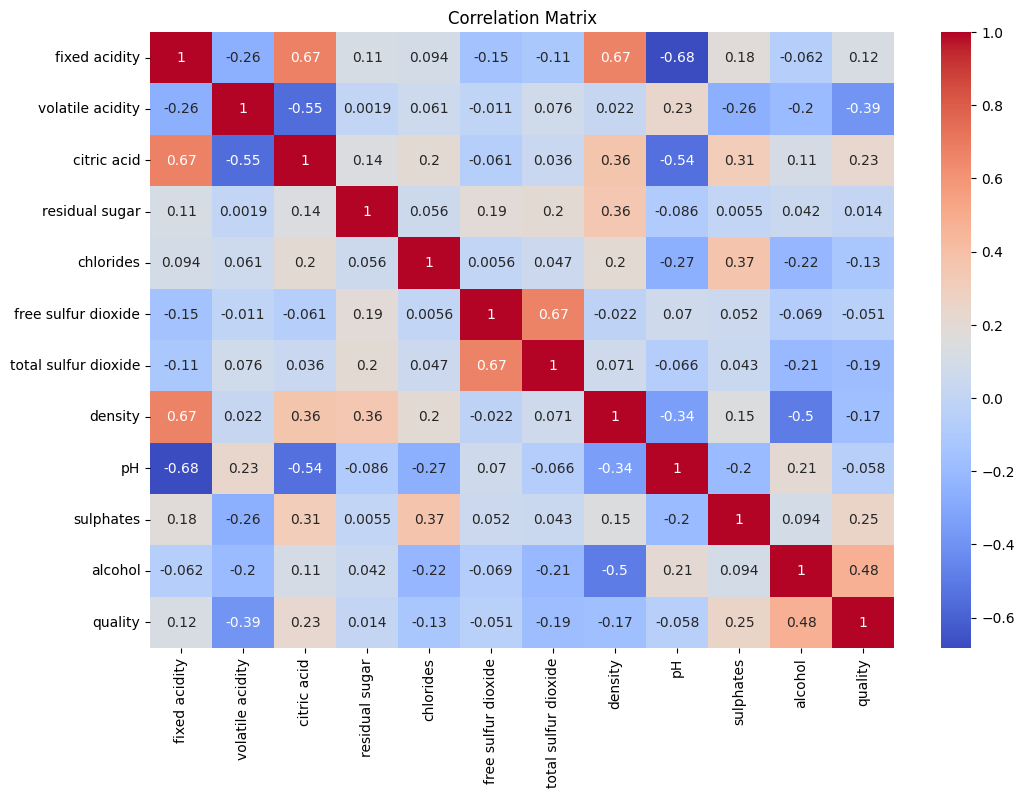

In [14]:
# Exploratory Data Analysis (EDA)
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Jayraj\AppData\Local\Temp\ipykernel_17260\1885841579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


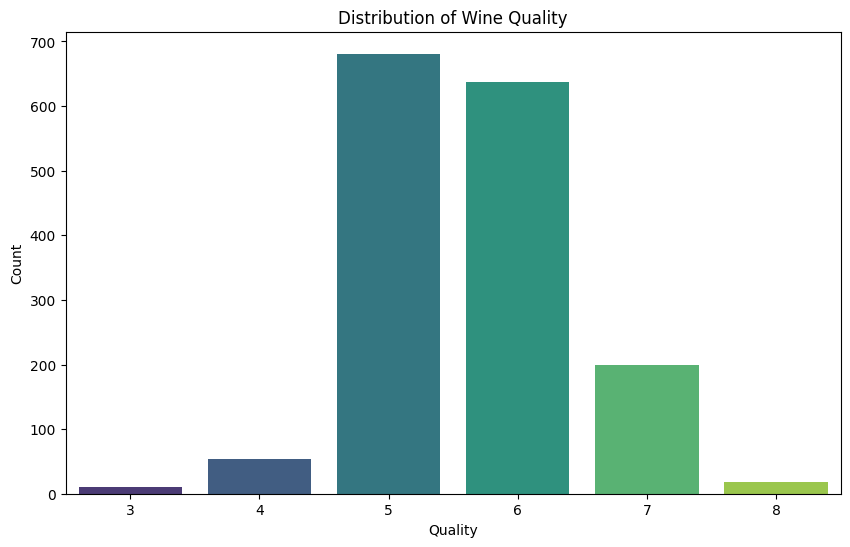

Quality Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [17]:

# Distribution of quality ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Print the distribution of quality ratings
quality_counts = df['quality'].value_counts().sort_index()
print('Quality Distribution:')
print(quality_counts)


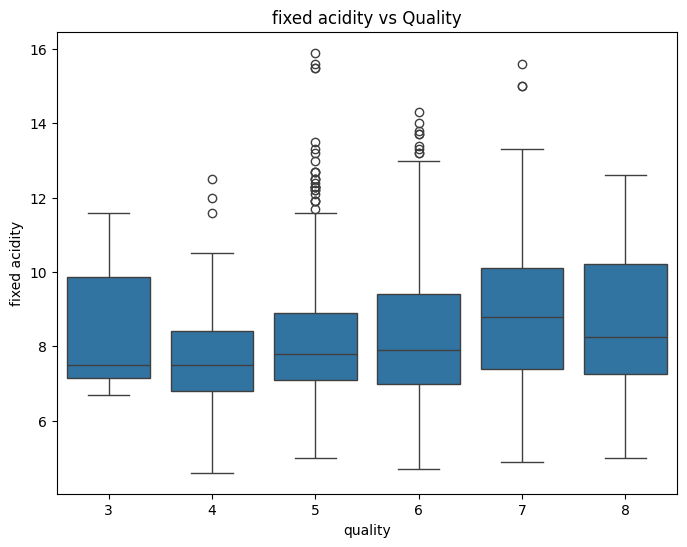

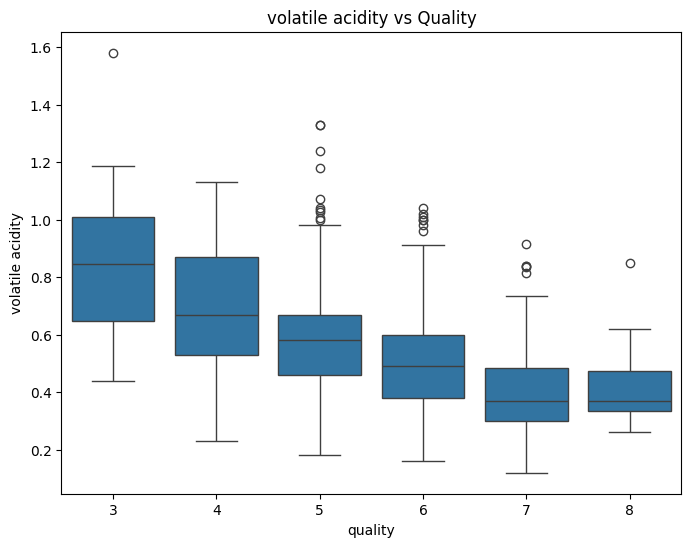

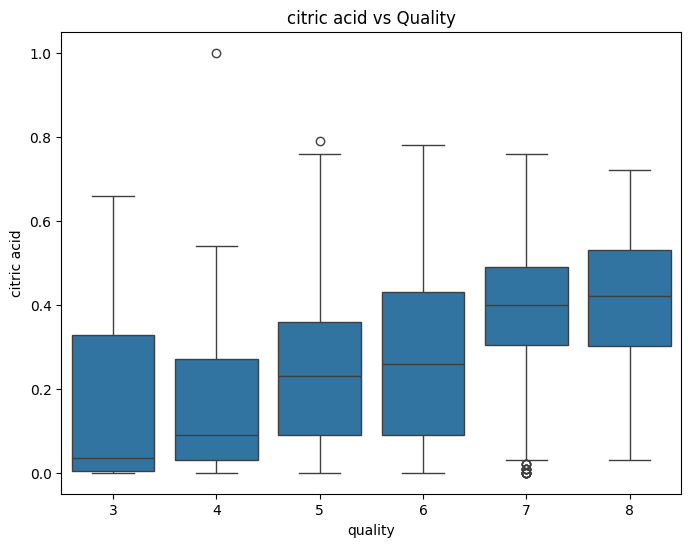

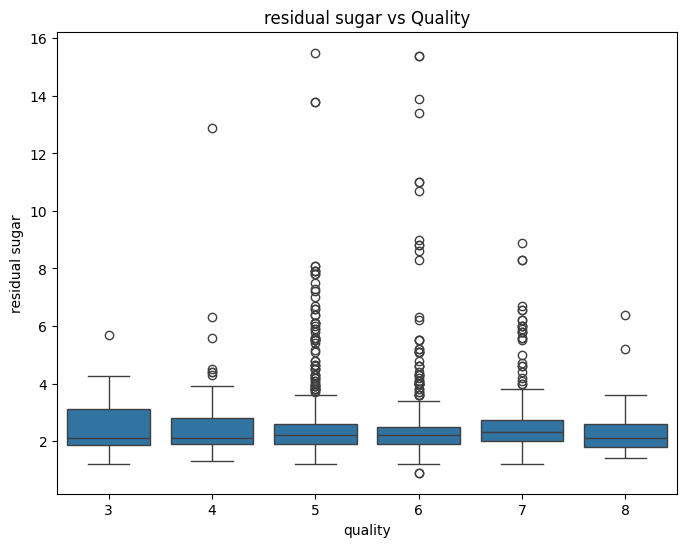

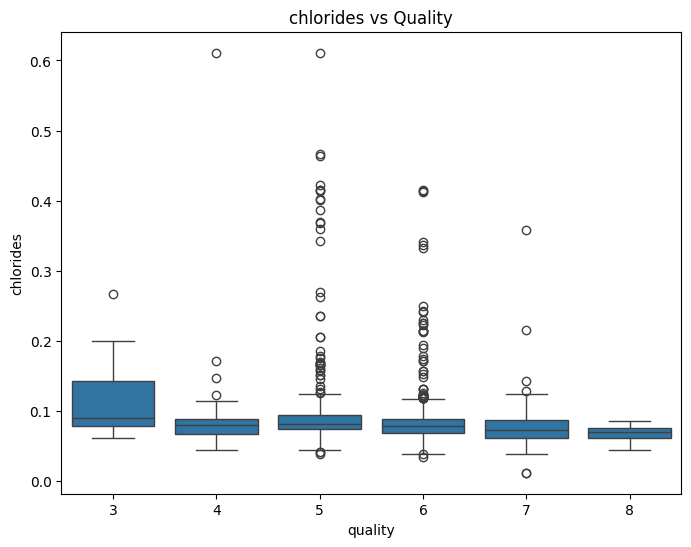

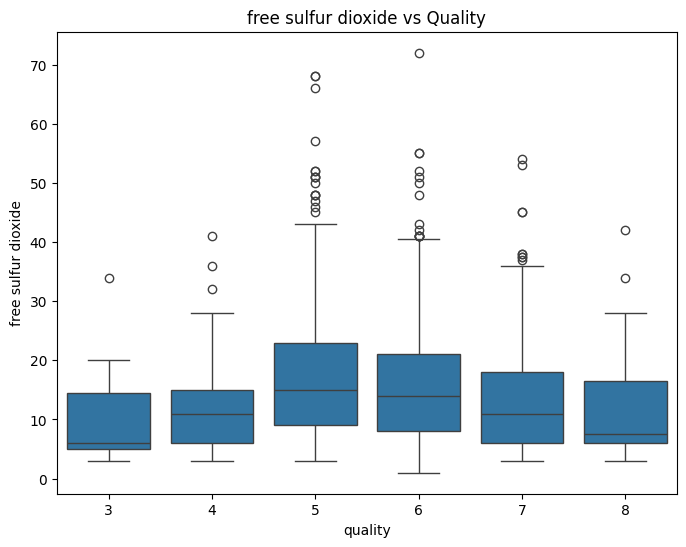

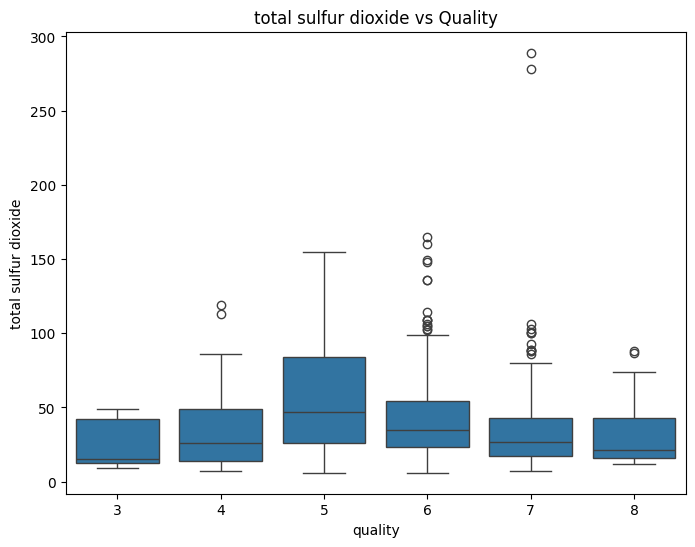

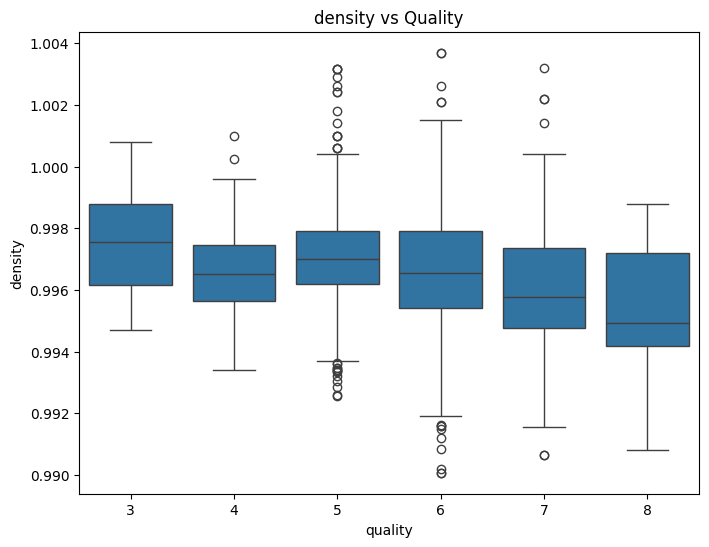

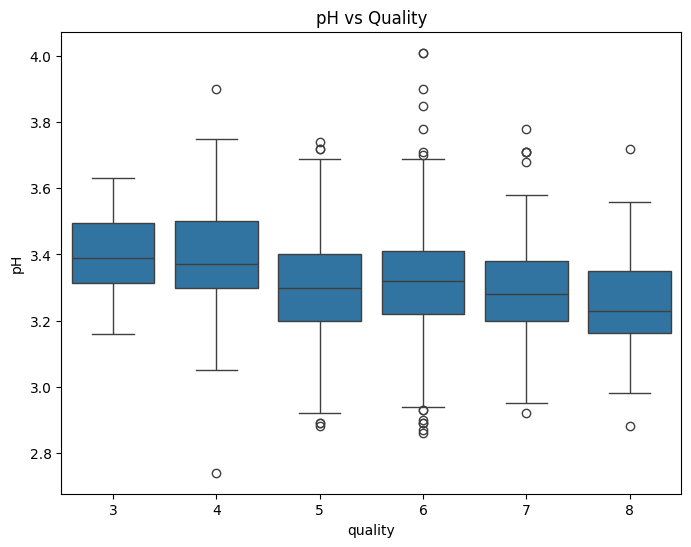

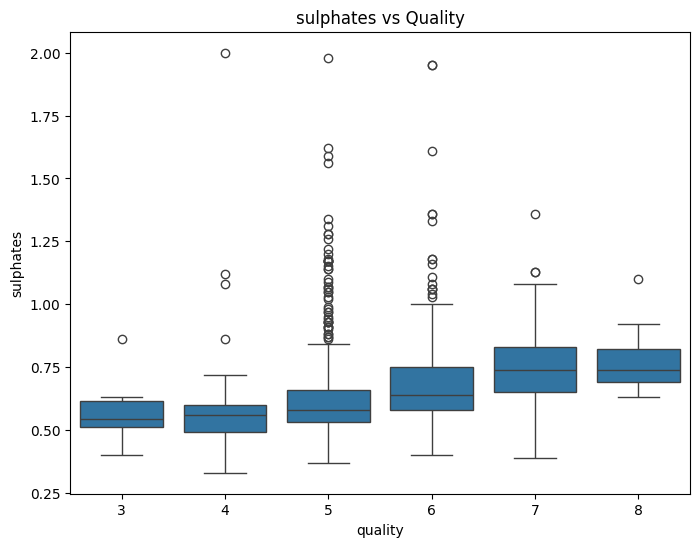

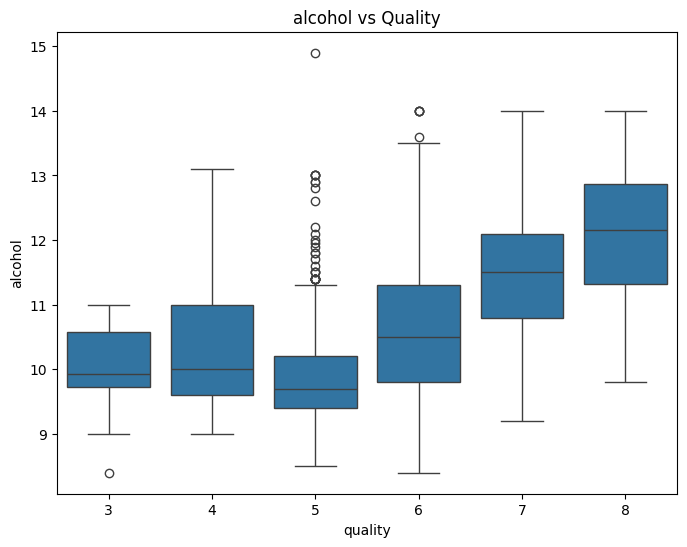

In [16]:
# Boxplots for chemical properties vs quality
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=column, data=df)
    plt.title(f'{column} vs Quality')
    plt.show()


In [18]:
# Feature Selection
# Select features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Model Training and Evaluation
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [23]:
# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  0 31 92  8  1]
 [ 0  0  0 18 23  1]
 [ 0  0  0  1  4  0]]
Accuracy Score: 0.659375


e:\CS_proj\mlwine\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\CS_proj\mlwine\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\CS_proj\mlwine\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


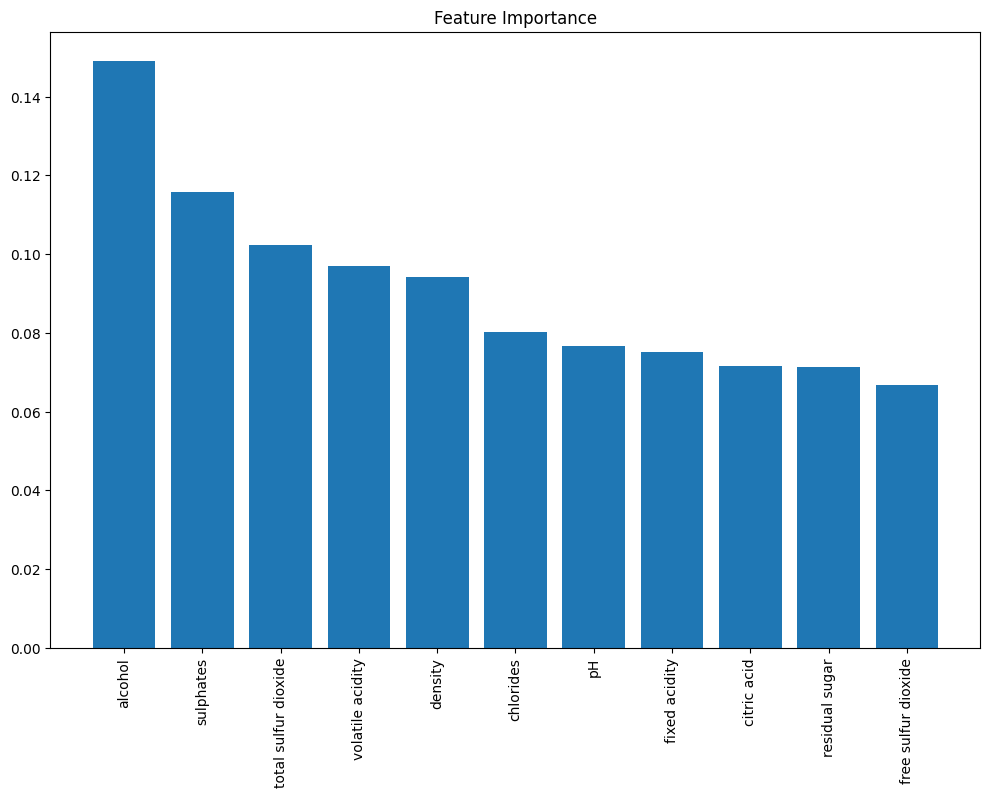

In [25]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns


plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

In [26]:
# Insights Extraction
# Analyze feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Feature Importances:')
print(feature_importances)

Feature Importances:
                 Feature  Importance
10               alcohol    0.148987
9              sulphates    0.115690
6   total sulfur dioxide    0.102300
1       volatile acidity    0.096902
7                density    0.094191
4              chlorides    0.080256
8                     pH    0.076720
0          fixed acidity    0.075106
2            citric acid    0.071624
3         residual sugar    0.071444
5    free sulfur dioxide    0.066778


In [27]:
# Additional insights
# Quality distribution in the dataset
quality_distribution = df['quality'].value_counts(normalize=True) * 100
print('Quality Distribution:')
print(quality_distribution)

Quality Distribution:
quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: proportion, dtype: float64


In [28]:
# Top contributing features
top_features = feature_importances.head(5)['Feature'].values
print('Top Contributing Features:')
print(top_features)

Top Contributing Features:
['alcohol' 'sulphates' 'total sulfur dioxide' 'volatile acidity' 'density']


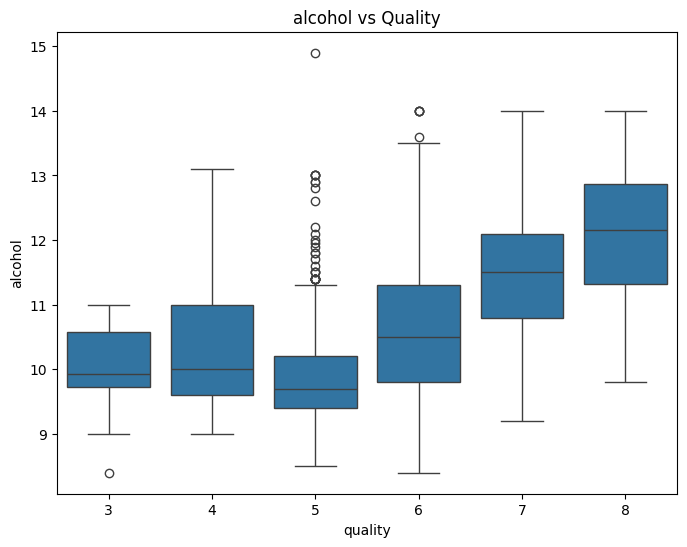

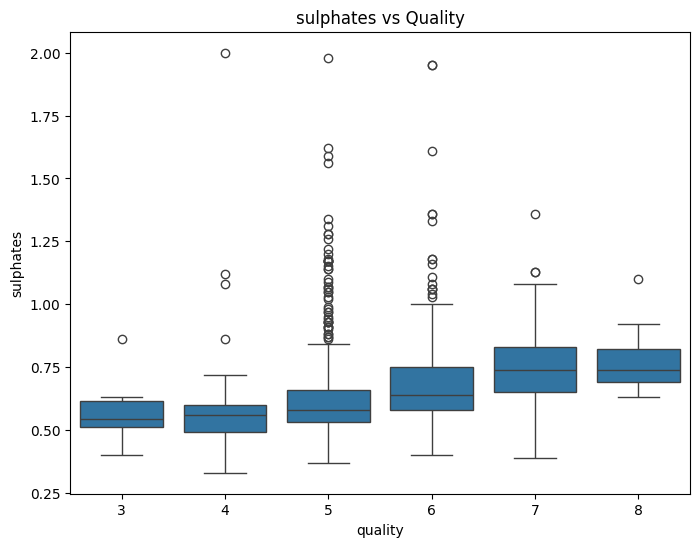

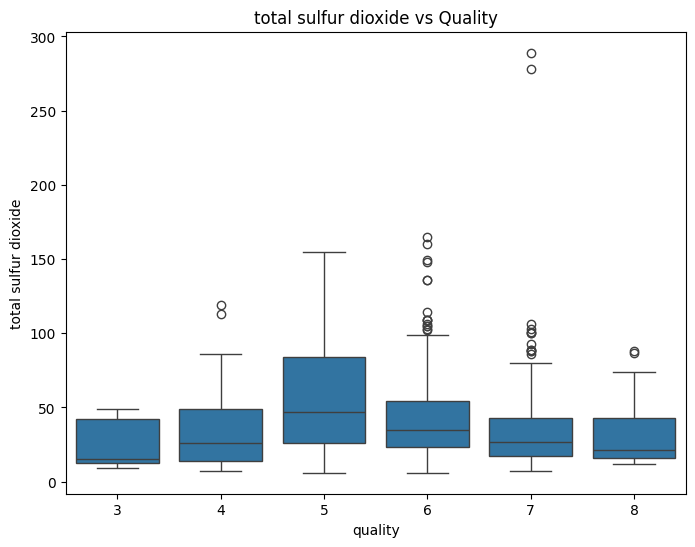

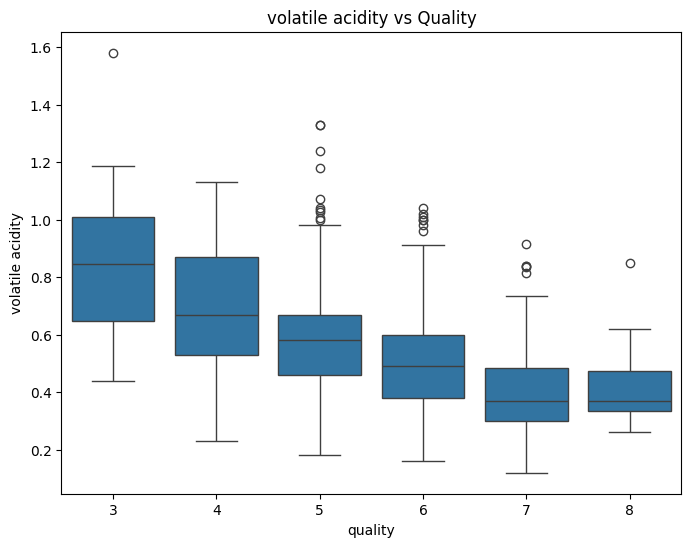

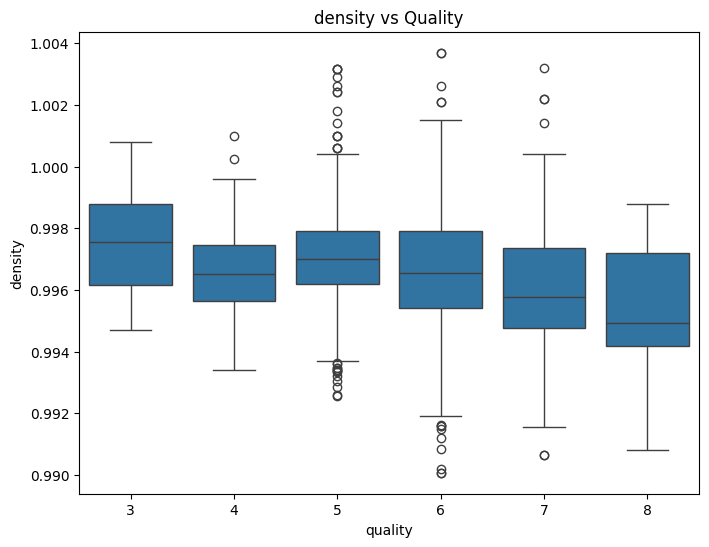

In [29]:
# Analyzing top features with respect to quality
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'{feature} vs Quality')
    plt.show()

## model_training

In [30]:
# Select features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression:

Accuracy Score: 0.575

--------------------------------------------------------------------------------

Decision Tree:

Accuracy Score: 0.5625

--------------------------------------------------------------------------------

Random Forest:

Accuracy Score: 0.659375

--------------------------------------------------------------------------------

Support Vector Classifier:

Accuracy Score: 0.603125

--------------------------------------------------------------------------------

K-Nearest Neighbors:

Accuracy Score: 0.546875

--------------------------------------------------------------------------------

Gradient Boosting:

Accuracy Score: 0.65

--------------------------------------------------------------------------------

Model Comparison:
                           Accuracy
Random Forest              0.659375
Gradient Boosting          0.650000
Support Vector Classifier  0.603125
Logistic Regression        0.575000
Decision Tree              0.562500
K-N

C:\Users\Jayraj\AppData\Local\Temp\ipykernel_17260\1720972234.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')


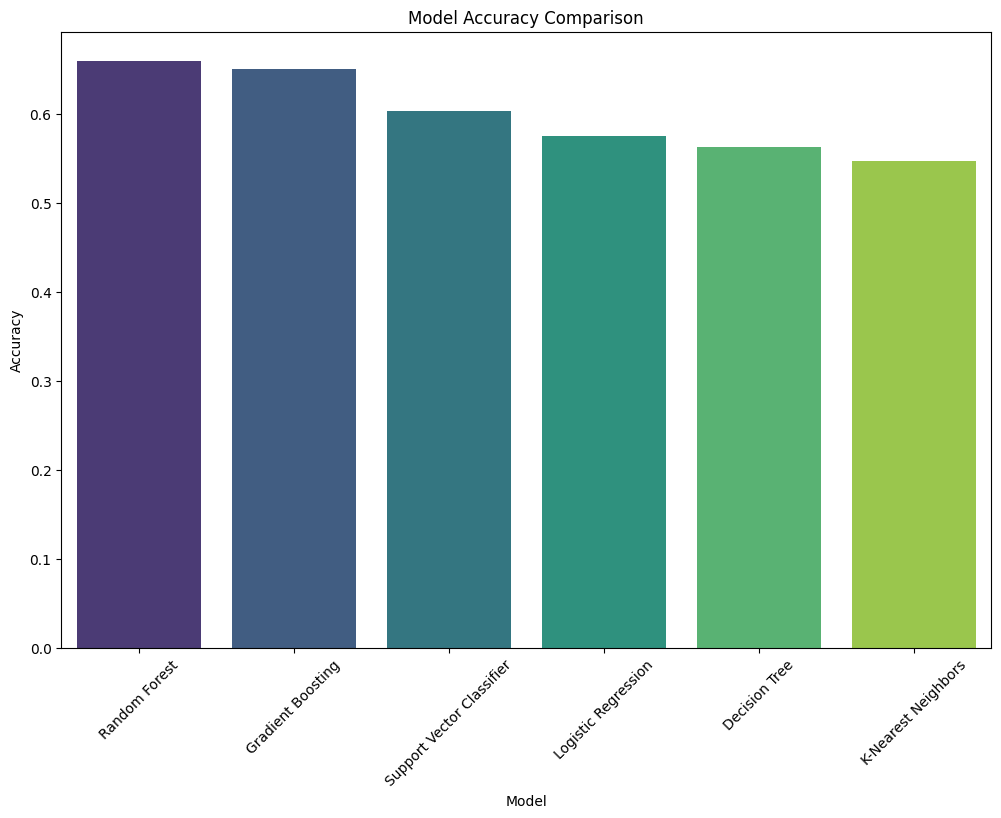

In [33]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print the classification report and confusion matrix
    print(f'{model_name}:\n')
    # print('Classification Report:')
    # print(classification_report(y_test, y_pred))
    # print('Confusion Matrix:')
    # print(confusion_matrix(y_test, y_pred))
    print('Accuracy Score:', accuracy)
    print('\n' + '-'*80 + '\n')

# Compare the models
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print('Model Comparison:')
print(results_df)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# # Load the dataset
df= pd.read_csv("E:\\CS_proj\\artifacts\\data_ingestion\\winequality-red.csv")



# Select features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Compare the models
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print('Model Comparison:')
print(results_df)




Model Comparison:
                           Accuracy
Random Forest              0.659375
Gradient Boosting          0.650000
Support Vector Classifier  0.603125
Logistic Regression        0.575000
Decision Tree              0.562500
K-Nearest Neighbors        0.546875


C:\Users\Jayraj\AppData\Local\Temp\ipykernel_5872\2732833559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')


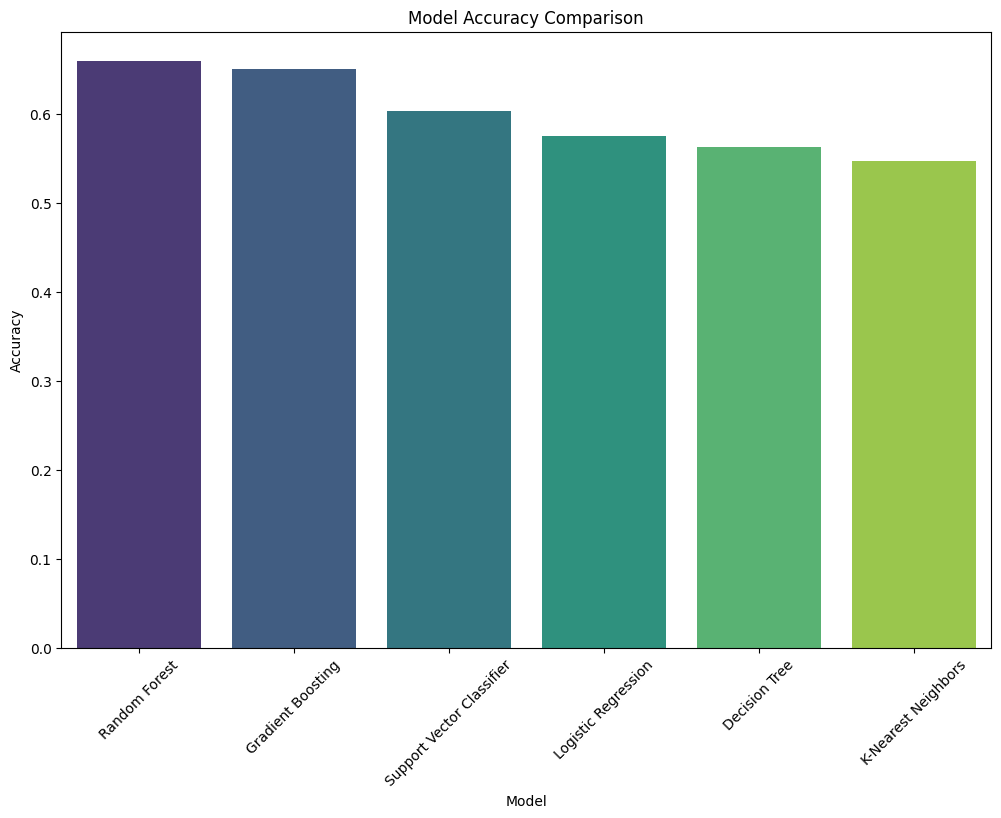

The model with the highest accuracy is Random Forest with an accuracy of 0.6594


In [14]:

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Print the model with the highest accuracy
best_model_name = results_df.idxmax().values[0]
best_model_accuracy = results_df.max().values[0]
print(f'The model with the highest accuracy is {best_model_name} with an accuracy of {best_model_accuracy:.4f}')